In [180]:
import os
import boto3
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
s3 = boto3.resource('s3')

In [5]:
for bucket in s3.buckets.all():
    print(bucket.name)

ecb-hackathon-data-admin-group-test01-x19s00
ecb-hackathon-data-group01-x19s00
ecb-hackathon-data-group02-x19s00
ecb-hackathon-data-group03-x19s00
ecb-hackathon-data-group04-x19s00
ecb-hackathon-data-group05-x19s00
ecb-hackathon-data-group06-x19s00
ecb-hackathon-data-group07-x19s00
ecb-hackathon-data-group08-x19s00
ecb-hackathon-data-group09-x19s00
ecb-hackathon-data-group10-x19s00
ecb-hackathon-data-landing-woiqj8
hackathon-state-bucket


In [206]:
bucket = 'ecb-hackathon-data-group10-x19s00'
for obj in s3.Bucket(bucket).objects.all():
    print(obj.key)

climate_data/
climate_data/absorbed_photosynthetically_active_radiation_anomaly/fpanv_NUTS3_MEDIAN_2012.csv
climate_data/absorbed_photosynthetically_active_radiation_anomaly/fpanv_NUTS3_MEDIAN_2013.csv
climate_data/absorbed_photosynthetically_active_radiation_anomaly/fpanv_NUTS3_MEDIAN_2014.csv
climate_data/absorbed_photosynthetically_active_radiation_anomaly/fpanv_NUTS3_MEDIAN_2015.csv
climate_data/absorbed_photosynthetically_active_radiation_anomaly/fpanv_NUTS3_MEDIAN_2016.csv
climate_data/absorbed_photosynthetically_active_radiation_anomaly/fpanv_NUTS3_MEDIAN_2017.csv
climate_data/absorbed_photosynthetically_active_radiation_anomaly/fpanv_NUTS3_MEDIAN_2018.csv
climate_data/heat_intensity/
climate_data/heat_intensity/intensity_2001-2022.csv
climate_data/low_flow_index/lfinx_NUTS3_MAX_2001.csv
climate_data/low_flow_index/lfinx_NUTS3_MAX_2002.csv
climate_data/low_flow_index/lfinx_NUTS3_MAX_2003.csv
climate_data/low_flow_index/lfinx_NUTS3_MAX_2004.csv
climate_data/low_flow_index/lfinx_N

# 1) Climate data

In [14]:
folder = 'climate_data'
s3_client = boto3.client('s3')

## 1.1) absorbed_photosynthetically_active_radiation_anomaly

The FAPAR Anomaly indicator that is implemented in the Copernicus European Drought Observatory (EDO) is used to detect and monitor the impacts on
vegetation growth and productivity of environmental stress factors, especially plant water stress due to drought. The FAPAR Anomaly indicator is
computed as deviations of the satellite-measured biophysical variable Fraction of Absorbed Photosynthetically Active Radiation, composited for 10-day
intervals, from its long-term mean values. FAPAR is one of the 50 so-called “Essential Climate Variables” (ECVs) that have been defined by the Global
Climate Observing System (GCOS) as being both feasible for global climate observation, and important to support the work of the United Nations
Framework Convention on Climate Change (UNFCCC) and the Intergovernmental Panel on Climate Change (IPCC) (Bojinski et al., 2014). (Of the 50
ECVs, 26 are listed as being significantly dependent on satellite observations). FAPAR values and their anomalies have been shown to be good indicators
for <span style="background-color:yellow">detecting and assessing drought impacts on plant canopies, such as agricultural crops and natural vegetation</span>(Gobron et al., 2005), and thus provide
information that is potentially useful for water and agricultural management purposes.
The FAPAR values are dimensionless, ranging from 0 (low vegetation photosynthetic productivity) to 1 (corresponding to maximum vegetation
photosynthetic activity. The FAPAR anomalies, used for this hackathon, are given in standard deviation units, commonly ranging from -4 (no
photosynthetic activity) to +4 (green, high photosynthetic activity).
The input data file contains an average monthly FAPAR ano

In [43]:
subfolder = 'absorbed_photosynthetically_active_radiation_anomaly' 
path = os.path.join(folder, subfolder)

In [53]:
container = list()
for dataset in s3_client.list_objects_v2(Bucket=bucket,
                                         Prefix=path)['Contents']:
    print(dataset['Key'])
    data = pd.read_csv(filepath_or_buffer=f"s3://{bucket}/{dataset['Key']}")
    print(data.head())
    print(f"{data.shape}\n\n")
    container.append(data)

climate_data/absorbed_photosynthetically_active_radiation_anomaly/fpanv_NUTS3_MEDIAN_2012.csv
  NUTS_ID   TIMESTAMP  MEDIAN
0      AD  2012-01-01   1.000
1   AL011  2012-01-01  -0.509
2   AL012  2012-01-01  -0.754
3   AL013  2012-01-01  -0.674
4   AL014  2012-01-01  -0.355
(17364, 3)


climate_data/absorbed_photosynthetically_active_radiation_anomaly/fpanv_NUTS3_MEDIAN_2013.csv
  NUTS_ID   TIMESTAMP  MEDIAN
0      AD  2013-01-01  -0.189
1   AL011  2013-01-01   0.402
2   AL012  2013-01-01   0.652
3   AL013  2013-01-01   0.216
4   AL014  2013-01-01   0.190
(17364, 3)


climate_data/absorbed_photosynthetically_active_radiation_anomaly/fpanv_NUTS3_MEDIAN_2014.csv
  NUTS_ID   TIMESTAMP  MEDIAN
0      AD  2014-01-01  -0.972
1   AL011  2014-01-01   0.717
2   AL012  2014-01-01   0.405
3   AL013  2014-01-01   0.629
4   AL014  2014-01-01   0.581
(17364, 3)


climate_data/absorbed_photosynthetically_active_radiation_anomaly/fpanv_NUTS3_MEDIAN_2015.csv
  NUTS_ID   TIMESTAMP  MEDIAN
0      AD  2015

In [58]:
data_fapar = pd.concat(container)

In [59]:
data_fapar

NUTS_ID   TIMESTAMP  MEDIAN
0          AD  2012-01-01   1.000
1       AL011  2012-01-01  -0.509
2       AL012  2012-01-01  -0.754
3       AL013  2012-01-01  -0.674
4       AL014  2012-01-01  -0.355
...       ...         ...     ...
17359   UKN0C  2018-12-01     NaN
17360   UKN0D  2018-12-01     NaN
17361   UKN0E  2018-12-01     NaN
17362   UKN0F  2018-12-01     NaN
17363   UKN0G  2018-12-01     NaN

[121548 rows x 3 columns]

In [77]:
data_fapar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121548 entries, 0 to 17363
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   NUTS_ID    121548 non-null  object 
 1   TIMESTAMP  121548 non-null  object 
 2   MEDIAN     112193 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.7+ MB


In [87]:
# TIMESTAMP is a string
type(data['TIMESTAMP'].to_list()[0])

str

In [103]:
# Convert string to datetime
data_fapar['ADD_TIMESTAMP']=data_fapar['TIMESTAMP'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

### 1.1.1) MEDIAN

### Missing Values

In [106]:
data_fapar.isnull().sum()

NUTS_ID             0
TIMESTAMP           0
MEDIAN           9355
ADD_TIMESTAMP       0
dtype: int64

In [107]:
f"Amount of missing data: {data_fapar['MEDIAN'].isnull().sum() / data_fapar.shape[0]:.2%}"

'Amount of missing data: 7.70%'

In [109]:
data_fapar.loc[data_fapar['MEDIAN'].isnull(),'TIMESTAMP'].value_counts()

TIMESTAMP
2014-12-01    811
2018-12-01    810
2012-12-01    806
2015-12-01    788
2017-12-01    786
             ... 
2015-09-01      1
2016-09-01      1
2014-09-01      1
2013-09-01      1
2017-09-01      1
Name: count, Length: 84, dtype: int64

In [115]:
# Check if missing values occur systematically (in a specific time period)
d = data_fapar.loc[data_fapar['MEDIAN'].isnull(),'TIMESTAMP'].value_counts().reset_index().sort_values('TIMESTAMP')
d

TIMESTAMP  count
13  2012-01-01    331
21  2012-02-01     26
61  2012-03-01      3
65  2012-04-01      2
36  2012-05-01      4
..         ...    ...
66  2018-08-01      2
78  2018-09-01      1
34  2018-10-01      5
17  2018-11-01    126
1   2018-12-01    810

[84 rows x 2 columns]

<Axes: title={'center': 'FAPAR - Missing MEDIAN values by date'}, ylabel='TIMESTAMP'>

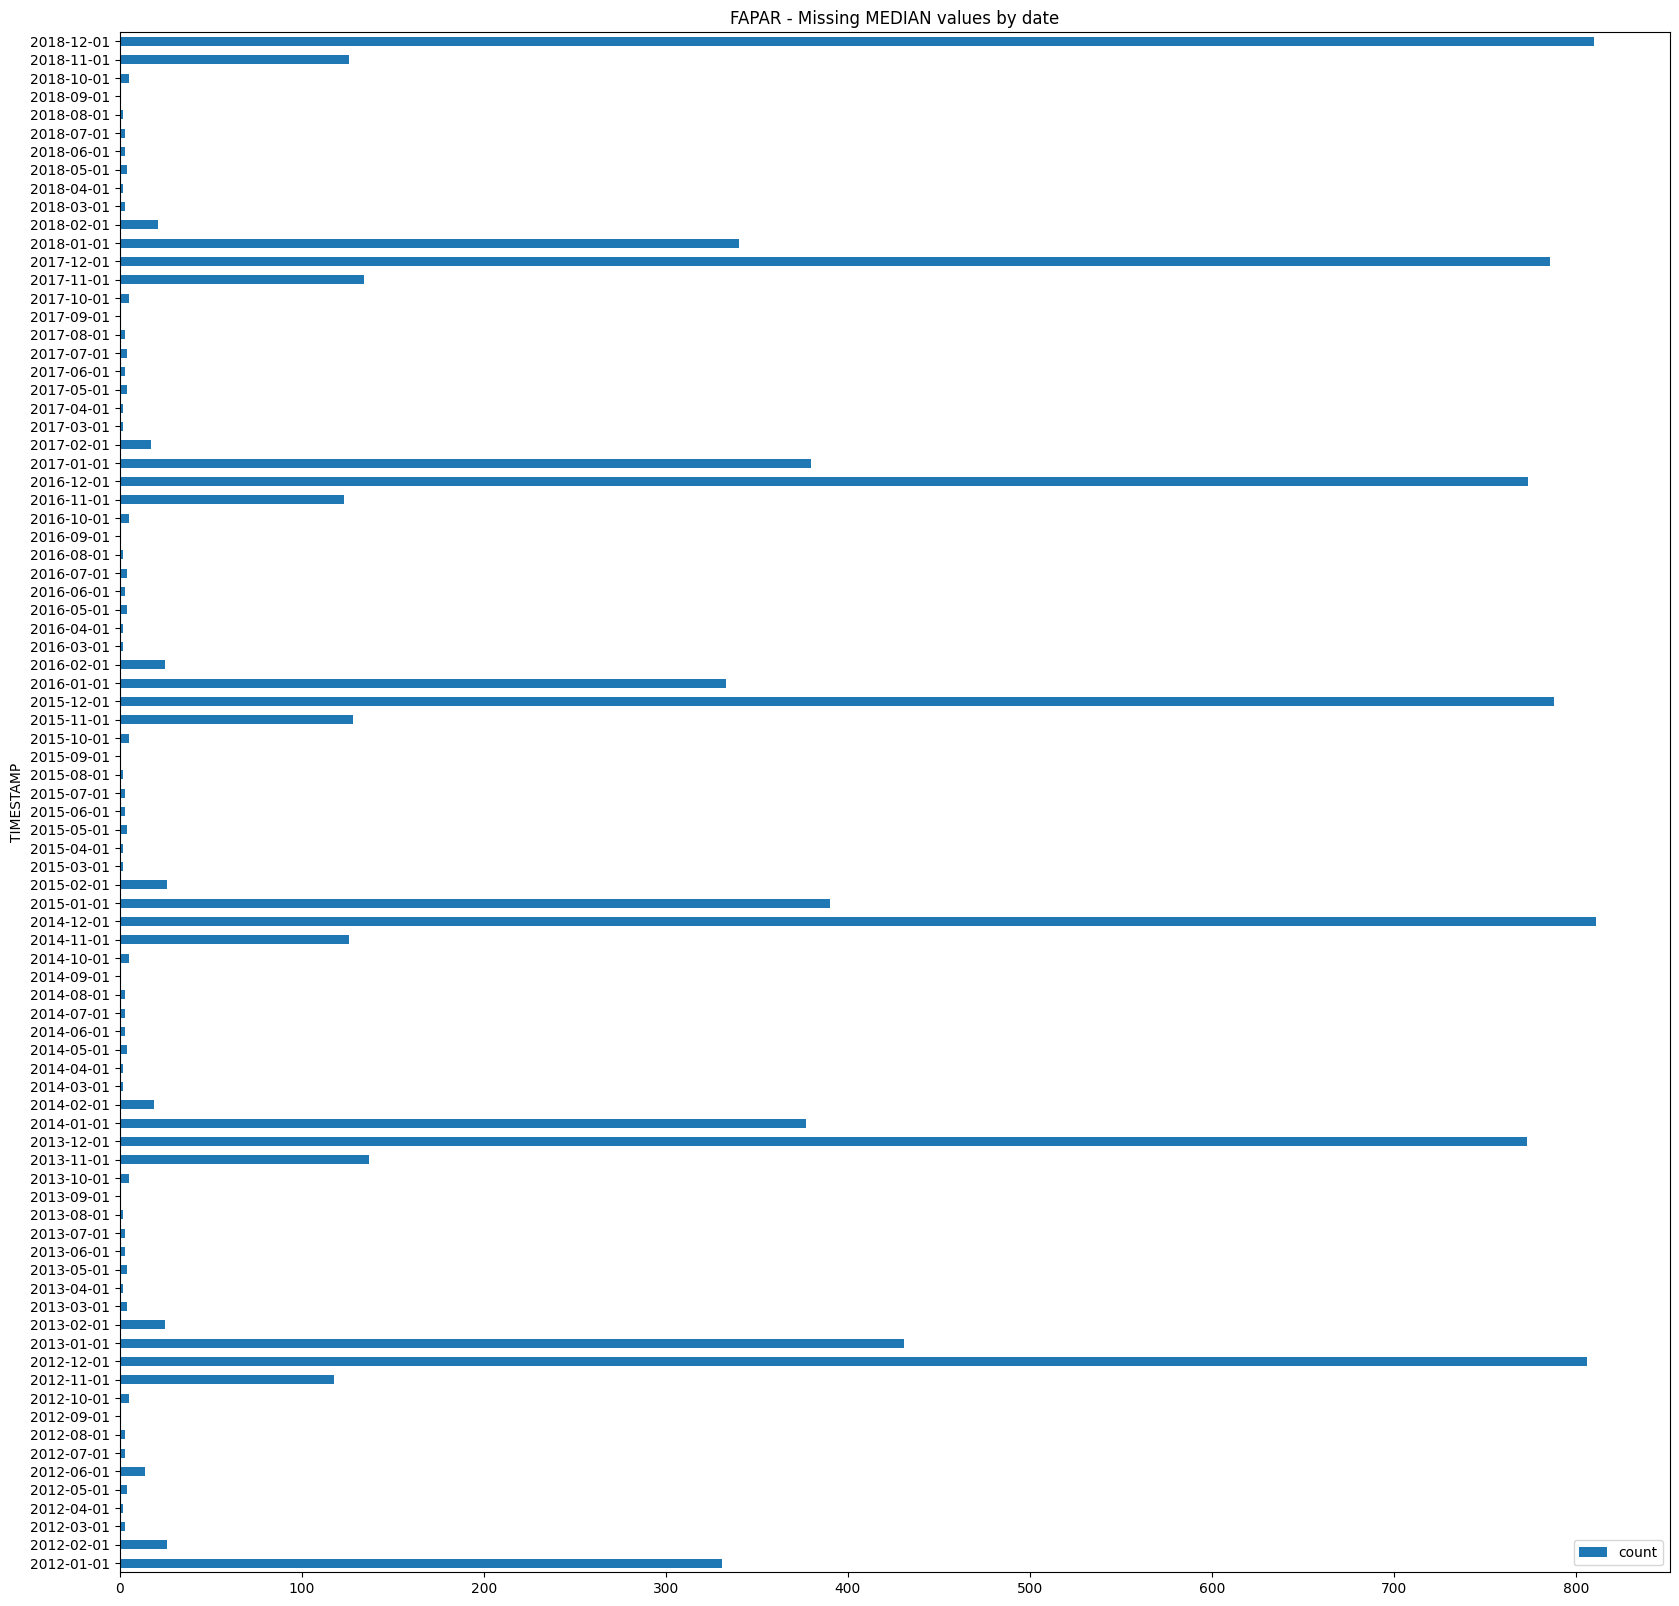

In [124]:
figsize = (20,20) # width, height
d.plot(x='TIMESTAMP', y='count', kind='barh', title='FAPAR - Missing MEDIAN values by date', figsize=figsize)

In [137]:
f"There are {len(data_fapar['NUTS_ID'].unique())} NUTS_IDs in the dataset"

'There are 1447 NUTS_IDs in the dataset'

In [146]:
data_fapar.loc[data_fapar['MEDIAN'].isnull(),'NUTS_ID'].value_counts().reset_index().sort_values('count', ascending=False)[:50]

NUTS_ID  count
0    NO0B1     57
1    NO0B2     56
2    DEA24     37
3    ES704     35
4    UKK41     35
5    NO074     35
16   IS001     28
17   SE321     28
8    FI1D8     28
9    FI194     28
14   FI195     28
15   FI1D2     28
10   FI1D7     28
11   SE332     28
12   FI1D5     28
13   NO071     28
6    SE331     28
7    FI1D9     28
18   FI193     25
21   LV006     24
20   NO060     24
19   FI1C3     24
23   SE322     23
26   FI1C4     23
27   IS002     23
25   NO081     23
24   FI1C2     23
22   FI1D3     23
32   NO0A3     22
33   UKD33     22
29   FI200     22
34   FI1D1     22
35   NO091     22
36   SE125     22
37   EE00A     22
38   SE313     22
28   FI197     22
31   FI1C1     22
30   FI1B1     22
68   UKM61     21
69   UKM82     21
43   UKM73     21
42   UKM75     21
57   UKM65     21
70   UKM81     21
71   EE008     21
56   UKM84     21
49   LV005     21
66   LT029     21
48   UKM93     21

Conclusion: It seems reasonable to impute the missing MEDIAN by using a mixture of TIME and NUTS_ID. @ToDo: Ask team

## 1.1.2) NUTS_ID

In [153]:
# Every NUTS_ID is represented equally
data_fapar['NUTS_ID'].value_counts()#.unique()

NUTS_ID
UKN0G    84
AD       84
AL011    84
AL012    84
AL013    84
         ..
AL033    84
AL034    84
AL035    84
AT111    84
AT112    84
Name: count, Length: 1447, dtype: int64

In [156]:
# The first two letters refer to the country
data_fapar['ADD_NUTS_ID_COUNTRY'] = data_fapar['NUTS_ID'].str[:2]

In [160]:
data_fapar

NUTS_ID   TIMESTAMP  MEDIAN ADD_TIMESTAMP ADD_NUTS_ID_COUNTRY
0          AD  2012-01-01   1.000    2012-01-01                  AD
1       AL011  2012-01-01  -0.509    2012-01-01                  AL
2       AL012  2012-01-01  -0.754    2012-01-01                  AL
3       AL013  2012-01-01  -0.674    2012-01-01                  AL
4       AL014  2012-01-01  -0.355    2012-01-01                  AL
...       ...         ...     ...           ...                 ...
17359   UKN0C  2018-12-01     NaN    2018-12-01                  UK
17360   UKN0D  2018-12-01     NaN    2018-12-01                  UK
17361   UKN0E  2018-12-01     NaN    2018-12-01                  UK
17362   UKN0F  2018-12-01     NaN    2018-12-01                  UK
17363   UKN0G  2018-12-01     NaN    2018-12-01                  UK

[121548 rows x 5 columns]

<Axes: title={'center': 'MEDIAN'}, xlabel='[ADD_NUTS_ID_COUNTRY]'>

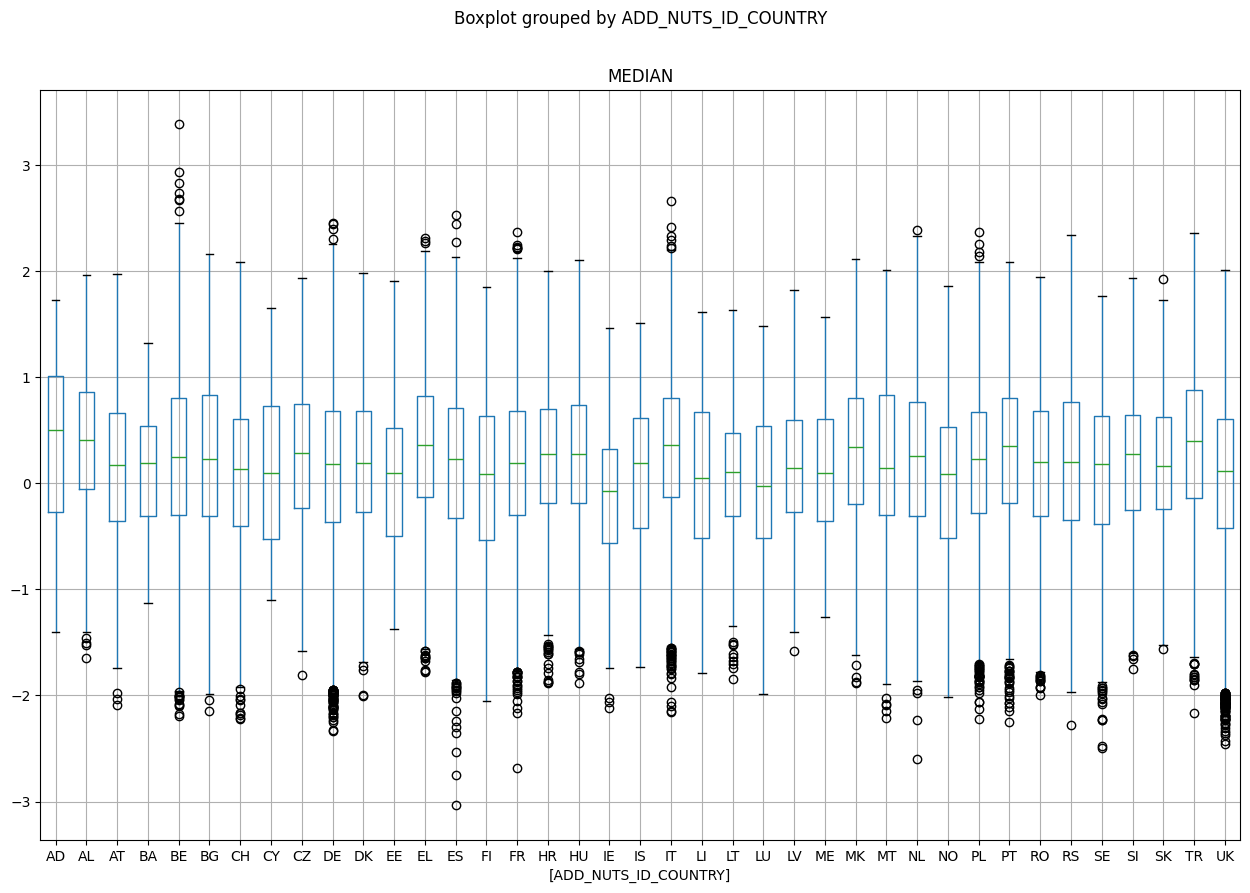

In [171]:
data_fapar.boxplot(by='ADD_NUTS_ID_COUNTRY',figsize=(15,10))

<Axes: xlabel='TIMESTAMP'>

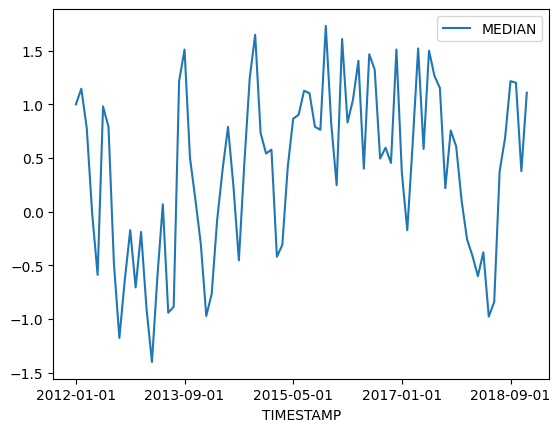

In [174]:
data_fapar[data_fapar.ADD_NUTS_ID_COUNTRY == 'AD'].plot(x='TIMESTAMP',y='MEDIAN', kind='line')

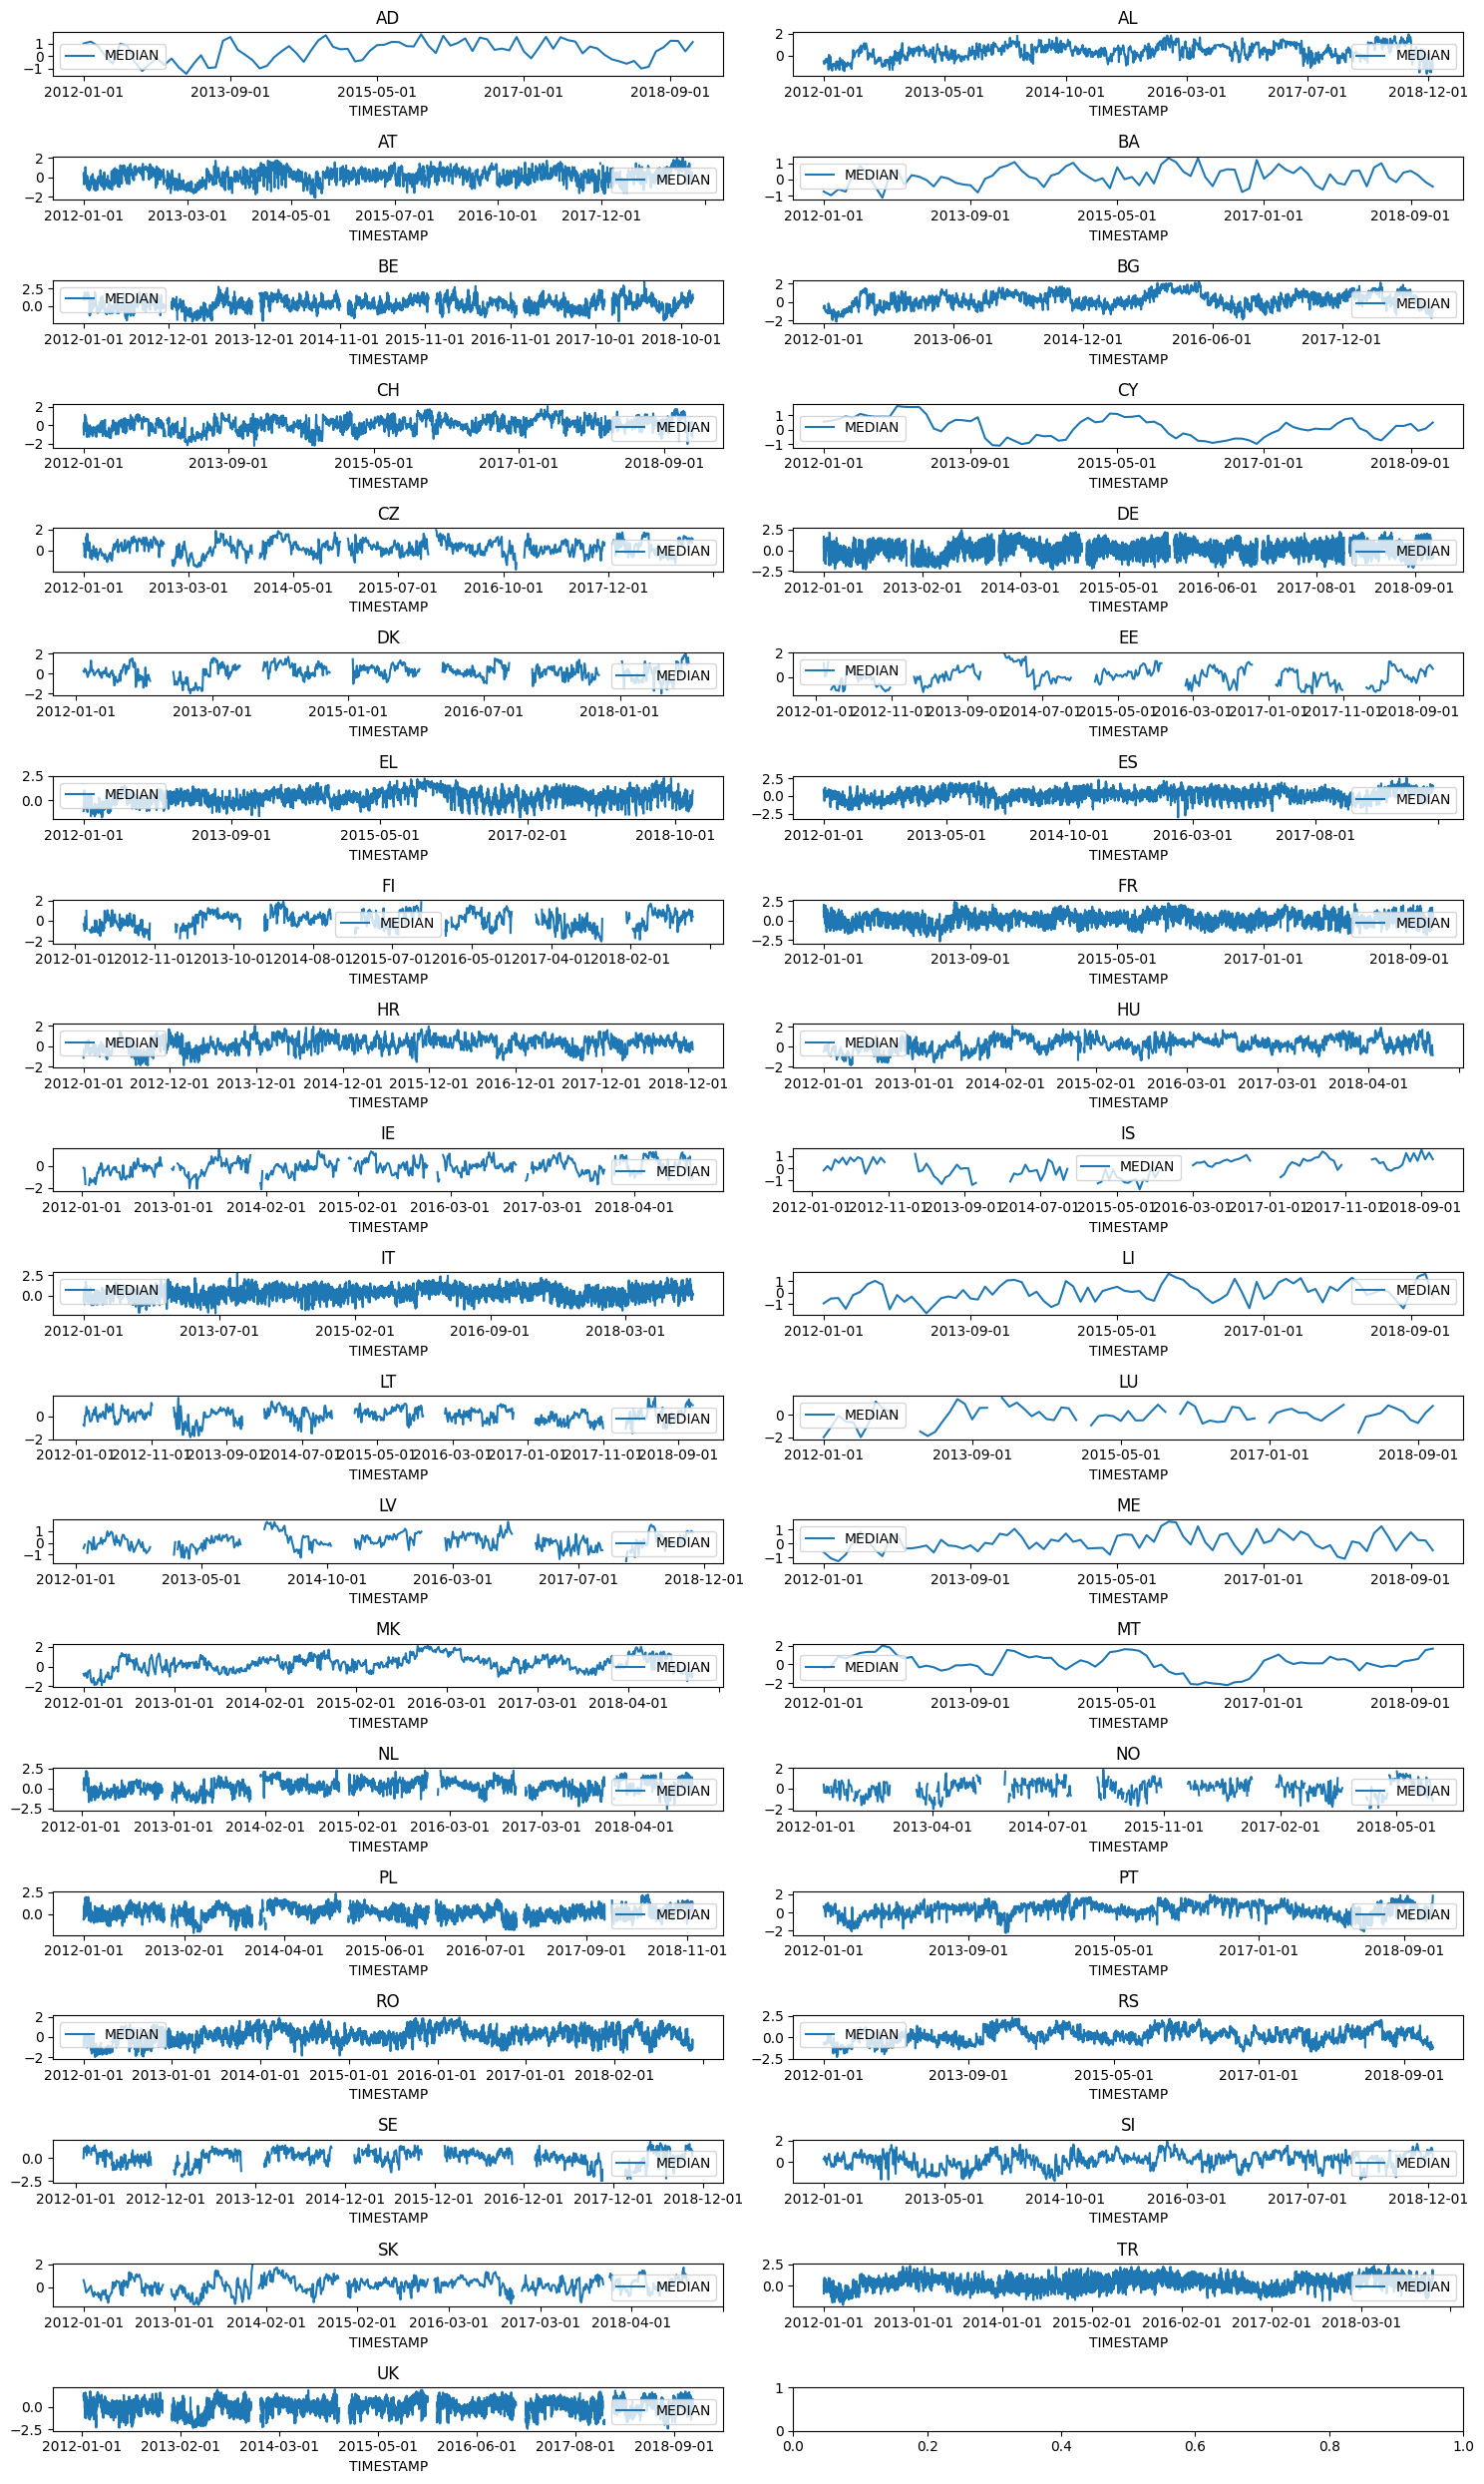

In [207]:
countries = data_fapar.ADD_NUTS_ID_COUNTRY.unique() # 39 countries
fig, axes = plt.subplots(20, 2, figsize=(15,25))
for country, ax in zip(countries, axes.flatten()):
    data_fapar[data_fapar.ADD_NUTS_ID_COUNTRY == country].plot(x='TIMESTAMP',y='MEDIAN', kind='line', title=country, ax=ax)
fig.tight_layout()

## 1.2) Heat intensity

In [235]:
subfolder = 'heat_intensity'
path = os.path.join(folder, subfolder)
path

'climate_data/heat_intensity'

In [237]:
s3_client.list_objects_v2(Bucket=bucket, Prefix=path)

{'ResponseMetadata': {'RequestId': 'PA2N0ZWYHZCPVAXT',
  'HostId': 't65TJsXwgP+Yfu7LGnbdTEKgxEae6bul/zae6ZaarovhfwWYVcvdVSpeYDIE12Buy8tH4uetP8c=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 't65TJsXwgP+Yfu7LGnbdTEKgxEae6bul/zae6ZaarovhfwWYVcvdVSpeYDIE12Buy8tH4uetP8c=',
   'x-amz-request-id': 'PA2N0ZWYHZCPVAXT',
   'date': 'Tue, 14 Nov 2023 08:54:22 GMT',
   'x-amz-bucket-region': 'eu-central-1',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'IsTruncated': False,
 'Contents': [{'Key': 'climate_data/heat_intensity/',
   'LastModified': datetime.datetime(2023, 11, 9, 22, 13, 34, tzinfo=tzlocal()),
   'ETag': '"d41d8cd98f00b204e9800998ecf8427e"',
   'Size': 0,
   'StorageClass': 'STANDARD'},
  {'Key': 'climate_data/heat_intensity/intensity_2001-2022.csv',
   'LastModified': datetime.datetime(2023, 11, 9, 22, 13, 34, tzinfo=tzlocal()),
   'ETag': '"42859035b8bf825f7bd826f8457d10ab"',
   'Size': 465307

In [238]:
container = list()
for dataset in s3_client.list_objects_v2(Bucket=bucket,
                                         Prefix=path)['Contents']:
    print(dataset['Key'])
    try:
        data = pd.read_csv(filepath_or_buffer=f"s3://{bucket}/{dataset['Key']}")
    except:
        print('Could not load object')
        continue
    print(data.head())
    print(f"{data.shape}\n\n")
    container.append(data)

climate_data/heat_intensity/
Could not load object
climate_data/heat_intensity/intensity_2001-2022.csv
                  date  year NUTS_ID    median
0  2001-01-08 23:00:00  2001   HU331  0.699417
1  2001-01-08 23:00:00  2001   HU233  0.468749
2  2001-01-08 23:00:00  2001   HR024  2.423235
3  2001-01-08 23:00:00  2001   HR033  1.596077
4  2001-01-08 23:00:00  2001   HR034  1.592936
(113730, 4)




In [239]:
data_heat_intensity = pd.concat(container)

In [240]:
data_heat_intensity

date  year NUTS_ID    median
0       2001-01-08 23:00:00  2001   HU331  0.699417
1       2001-01-08 23:00:00  2001   HU233  0.468749
2       2001-01-08 23:00:00  2001   HR024  2.423235
3       2001-01-08 23:00:00  2001   HR033  1.596077
4       2001-01-08 23:00:00  2001   HR034  1.592936
...                     ...   ...     ...       ...
113725  2022-12-31 23:00:00  2022   DE24A  6.335873
113726  2022-12-31 23:00:00  2022   ES533  1.452705
113727  2022-12-31 23:00:00  2022   DE24B  6.378663
113728  2022-12-31 23:00:00  2022   PL414  3.879445
113729  2022-12-31 23:00:00  2022   DEF06  5.469074

[113730 rows x 4 columns]

In [241]:
data_heat_intensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113730 entries, 0 to 113729
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     113730 non-null  object 
 1   year     113730 non-null  int64  
 2   NUTS_ID  113730 non-null  object 
 3   median   113730 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.5+ MB


In [242]:
# Turning date (str) to datetime
data_heat_intensity['ADD_datetime'] = data_heat_intensity['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [243]:
data_heat_intensity.isnull().sum()

date            0
year            0
NUTS_ID         0
median          0
ADD_datetime    0
dtype: int64

## 1.3) low flow index

In [245]:
subfolder = 'low_flow_index'
path = os.path.join(folder, subfolder)
path

'climate_data/low_flow_index'

In [246]:
container = list()
for dataset in s3_client.list_objects_v2(Bucket=bucket,
                                         Prefix=path)['Contents']:
    print(dataset['Key'])
    try:
        data = pd.read_csv(filepath_or_buffer=f"s3://{bucket}/{dataset['Key']}")
    except:
        print('Could not load object')
        continue
    print(data.head())
    print(f"{data.shape}\n\n")
    container.append(data)

climate_data/low_flow_index/lfinx_NUTS3_MAX_2001.csv
  NUTS_ID   TIMESTAMP  \
0   AL011  2001-01-01   
1   AL013  2001-01-01   
2   AL014  2001-01-01   
3   AL015  2001-01-01   
4   AL021  2001-01-01   

    MONTHLY_MAX                                                   
0                                                0.0              
1                                                0.0              
2                                                0.0              
3                                                0.0              
4                                                0.0              
(15348, 3)


climate_data/low_flow_index/lfinx_NUTS3_MAX_2002.csv
  NUTS_ID   TIMESTAMP  \
0   AL011  2002-01-01   
1   AL013  2002-01-01   
2   AL014  2002-01-01   
3   AL015  2002-01-01   
4   AL021  2002-01-01   

    MONTHLY_MAX                                                   
0                                              0.893              
1                                          

In [249]:
data_low_flow_index=pd.concat(container)
data_low_flow_index

NUTS_ID   TIMESTAMP  \
0       AL011  2001-01-01   
1       AL013  2001-01-01   
2       AL014  2001-01-01   
3       AL015  2001-01-01   
4       AL021  2001-01-01   
...       ...         ...   
15343   UKN0B  2018-12-01   
15344   UKN0C  2018-12-01   
15345   UKN0D  2018-12-01   
15346   UKN0F  2018-12-01   
15347   UKN0G  2018-12-01   

        MONTHLY_MAX                                                   
0                                                    0.0              
1                                                    0.0              
2                                                    0.0              
3                                                    0.0              
4                                                    0.0              
...                                                  ...              
15343                                                0.0              
15344                                                0.0              
15345                                                0.0              
15346                                                0.0              
15347                                                0.0              

[276264 rows x 3 columns]

In [250]:
data_low_flow_index.isnull().sum()

NUTS_ID                                                          0
 TIMESTAMP                                                       0
 MONTHLY_MAX                                                     0
dtype: int64

## 1.4) Soil Mosture Anomaly

In [251]:
subfolder = 'soil_mosture_anomaly'
path = os.path.join(folder, subfolder)
path

'climate_data/soil_mosture_anomaly'

In [252]:
container = list()
for dataset in s3_client.list_objects_v2(Bucket=bucket,
                                         Prefix=path)['Contents']:
    print(dataset['Key'])
    try:
        data = pd.read_csv(filepath_or_buffer=f"s3://{bucket}/{dataset['Key']}")
    except:
        print('Could not load object')
        continue
    print(data.head())
    print(f"{data.shape}\n\n")
    container.append(data)

climate_data/soil_mosture_anomaly/smian_NUTS3_MEDIAN_2001.csv
  NUTS_CODE   TIMESTAMP  MEDIAN
0        AD  2001-01-01   0.815
1     AL011  2001-01-01  -0.324
2     AL012  2001-01-01   0.735
3     AL013  2001-01-01   0.573
4     AL014  2001-01-01   0.785
(17976, 3)


climate_data/soil_mosture_anomaly/smian_NUTS3_MEDIAN_2002.csv
  NUTS_CODE   TIMESTAMP  MEDIAN
0        AD  2002-01-01  -1.353
1     AL011  2002-01-01  -1.051
2     AL012  2002-01-01  -0.041
3     AL013  2002-01-01   0.038
4     AL014  2002-01-01  -0.326
(17976, 3)


climate_data/soil_mosture_anomaly/smian_NUTS3_MEDIAN_2003.csv
  NUTS_CODE   TIMESTAMP  MEDIAN
0        AD  2003-01-01   0.997
1     AL011  2003-01-01   0.602
2     AL012  2003-01-01   0.748
3     AL013  2003-01-01   0.630
4     AL014  2003-01-01   0.783
(17976, 3)


climate_data/soil_mosture_anomaly/smian_NUTS3_MEDIAN_2004.csv
  NUTS_CODE   TIMESTAMP  MEDIAN
0        AD  2004-01-01   1.089
1     AL011  2004-01-01  -0.316
2     AL012  2004-01-01   0.489
3     AL0

In [254]:
data_soil_mosture_anomaly = pd.concat(container)
data_soil_mosture_anomaly

NUTS_CODE   TIMESTAMP  MEDIAN
0            AD  2001-01-01   0.815
1         AL011  2001-01-01  -0.324
2         AL012  2001-01-01   0.735
3         AL013  2001-01-01   0.573
4         AL014  2001-01-01   0.785
...         ...         ...     ...
17971     UKN0C  2018-12-01  -0.214
17972     UKN0D  2018-12-01   0.153
17973     UKN0E  2018-12-01   0.165
17974     UKN0F  2018-12-01   0.156
17975     UKN0G  2018-12-01   0.008

[323568 rows x 3 columns]